In [1]:
!pip install factor_analyzer

In [32]:
df=pd.read_csv('data.csv')
df

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,1,...,0,0,1,0,0,0,0,0,1,0
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,1,...,0,0,1,1,0,0,0,0,1,0
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,1,...,0,1,1,1,0,0,0,1,1,1
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,0,...,0,0,0,0,0,0,0,0,0,0
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,1,...,0,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,3,...,0,1,1,1,1,1,1,1,1,1
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,1,...,0,0,1,1,0,0,0,0,1,1
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,1,...,0,0,0,1,0,0,0,0,0,0
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,1,...,0,1,1,1,0,0,0,0,1,1


In [4]:
df.drop(['id','neighborhood','price','latitude', 'longitude'],axis=1,inplace=True)


In [5]:
df.columns

Index(['size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms',
       'quality', 'maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'],
      dtype='object')

In [6]:
df.isnull().sum()

size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

In [7]:
df.head()


,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,1079,2502.32,1,2,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,1582,1801.52,2,2,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
2,1951,589.44,3,5,1,1,1,1,0,1,...,0,1,1,1,0,0,0,1,1,1
3,2020,1410.89,2,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,507,3410.65,0,1,1,0,0,0,0,1,...,0,1,1,1,1,0,0,1,1,0


In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(df)
print("Chi Square Value, P Values=",chi_square_value,p_value)

Chi Square Value, P Values= 31410.00021327712 0.0


In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print('kmo_value=',kmo_model,"\n",f"KMO of all variables={kmo_all}") # kmo_value is greater then 0.5 it is acceptable

kmo_value= 0.9037496976339969 
 KMO of all variables=[0.81919185 0.71190768 0.69670735 0.73951246 0.92024584 0.94479458
 0.7713373  0.94415251 0.93033969 0.9344609  0.93814521 0.91652984
 0.91190943 0.91597222 0.95072933 0.92607624 0.89506172 0.95936695
 0.92638163 0.89627285 0.65433905 0.63764191 0.69048169 0.6498833
 0.88967879 0.88447357 0.88915017 0.95920239 0.9582906  0.90851566
 0.94273159 0.94577635 0.94821937]


C:\Users\SHEETAL YADAV\anaconda3\anaconda\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


<Axes: >

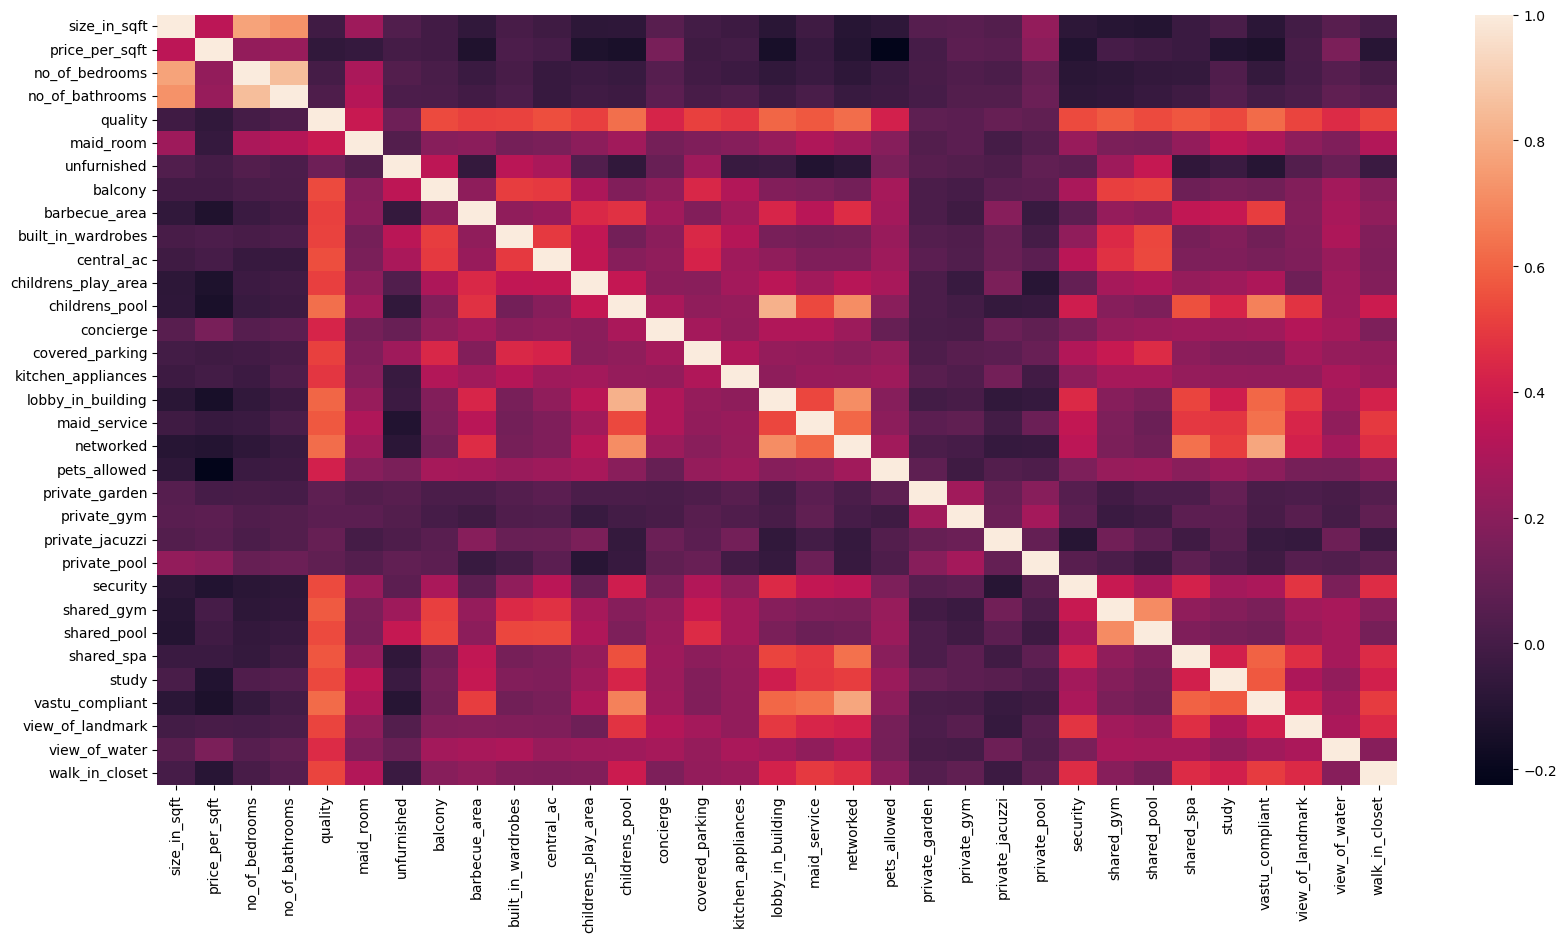

In [10]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c)

In [11]:
df.corr()

,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
size_in_sqft,1.000000,0.344276,0.775113,0.725397,-0.017935,0.256670,0.036362,-0.011275,-0.064532,0.009049,...,0.225326,-0.080229,-0.097201,-0.105844,-0.033917,0.013451,-0.085137,-0.007963,0.054406,0.004608
price_per_sqft,0.344276,1.000000,0.226340,0.236630,-0.066221,-0.051686,0.000384,-0.011678,-0.122140,0.021549,...,0.202213,-0.114153,0.001744,-0.016600,-0.033141,-0.113722,-0.132305,0.009303,0.162436,-0.092872
no_of_bedrooms,0.775113,0.226340,1.000000,0.854384,-0.000227,0.294049,0.041212,0.010534,-0.033927,0.006719,...,0.097980,-0.087085,-0.076853,-0.057302,-0.052800,0.032837,-0.054797,0.004233,0.052717,0.007664
no_of_bathrooms,0.725397,0.236630,0.854384,1.000000,0.025052,0.321765,0.019860,0.016349,-0.012707,0.024052,...,0.114242,-0.079751,-0.067975,-0.046059,-0.022038,0.044224,-0.007369,0.017504,0.079668,0.048491
quality,-0.017935,-0.066221,-0.000227,0.025052,1.000000,0.380593,0.122865,0.536443,0.513451,0.519916,...,0.078575,0.536570,0.574468,0.539420,0.565023,0.531865,0.618506,0.524750,0.454238,0.525843
maid_room,0.256670,-0.051686,0.294049,0.321765,0.380593,1.000000,0.042344,0.193162,0.202309,0.140638,...,0.045353,0.244326,0.162105,0.150370,0.227152,0.347188,0.300969,0.212149,0.168580,0.312392
unfurnished,0.036362,0.000384,0.041212,0.019860,0.122865,0.042344,1.000000,0.347385,-0.055181,0.336751,...,0.083053,0.067770,0.256626,0.368902,-0.070378,-0.035564,-0.096208,0.041331,0.102538,-0.036643
balcony,-0.011275,-0.011678,0.010534,0.016349,0.536443,0.193162,0.347385,1.000000,0.212794,0.503287,...,0.069020,0.291385,0.509941,0.521799,0.117404,0.147574,0.131778,0.182100,0.269099,0.196144
barbecue_area,-0.064532,-0.122140,-0.033927,-0.012707,0.513451,0.202309,-0.055181,0.212794,1.000000,0.219652,...,-0.041437,0.070216,0.230325,0.207986,0.356902,0.373414,0.506818,0.185347,0.284618,0.218404
built_in_wardrobes,0.009049,0.021549,0.006719,0.024052,0.519916,0.140638,0.336751,0.503287,0.219652,1.000000,...,-0.003343,0.218033,0.449670,0.530413,0.147559,0.177610,0.133598,0.172737,0.300471,0.177325


In [12]:
from factor_analyzer import FactorAnalyzer
fa=FactorAnalyzer(rotation=None)
fa.fit(df)
ev,v=fa.get_eigenvalues()
ev


array([8.53122524, 3.29226169, 2.96199331, 1.64352821, 1.5017916 ,
       1.3390549 , 1.00046395, 0.85152361, 0.82336465, 0.79612366,
       0.77947166, 0.75041605, 0.73463414, 0.66758284, 0.63588838,
       0.60804652, 0.56057849, 0.55031997, 0.52677276, 0.50385651,
       0.4832875 , 0.45899317, 0.43998007, 0.42352068, 0.40328918,
       0.35944969, 0.27490312, 0.26423078, 0.23938416, 0.20970232,
       0.15276524, 0.12766179, 0.10393419])

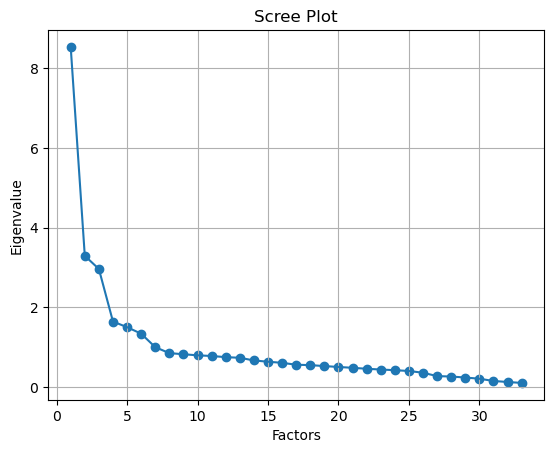

In [13]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [14]:
factor1 has quality,barbecue_area,childrens_pool,lobby_in_building,maid_service,networked,shared_spa,study,vastu_compliant,
             view_of_landmark,walk_in_closet
factor 2 has balcony,built_in_wardrobes,central_ac,shared_gym,shared_pool,covered_parking,unfurnished
factor 3 has size_in_sqft,no_of_bedrooms,no_of_bathrooms
factor 4 has private_gym,private_pool,private_gym
factor 5 has play area,private_jacuzzi,barbecue_area
factor 6 has price_per_sqft
factor 7 has kitchen_appliances

SyntaxError: invalid syntax (3940584029.py, line 1)

# no rotation

In [15]:
fa = FactorAnalyzer(n_factors=7,rotation=None, method='principal')
fa.fit(df)

fa.loadings_
floading=pd.DataFrame(fa.loadings_)
floading


,0,1,2,3,4,5,6
0,-0.062162,0.173166,0.870633,-0.057370,-0.065419,0.023924,0.039815
1,-0.107994,0.199039,0.411656,0.172910,0.085867,-0.614938,-0.008258
2,-0.039126,0.164400,0.875146,-0.194749,-0.151374,0.115745,0.044967
3,0.001451,0.147430,0.872081,-0.193862,-0.121157,0.098030,-0.004412
4,0.937272,0.124964,0.014762,-0.000368,0.025322,0.001634,-0.046523
5,0.422038,0.000879,0.401206,-0.087661,-0.103453,0.352122,-0.161932
6,0.122530,0.552384,-0.058391,0.128570,-0.153108,0.124944,0.524679
7,0.505261,0.549408,-0.086380,-0.009954,-0.094356,0.072080,0.012935
8,0.572459,-0.118635,-0.028419,-0.403103,0.349780,-0.028718,0.135644
9,0.490739,0.551684,-0.079770,-0.076081,0.001854,0.018078,0.014595


In [16]:
floading.rename(index = {0:'size_in_sqft',1: 'price_per_sqft',2: 'no_of_bedrooms',3:'no_of_bathrooms',
       4:'quality',5: 'maid_room',6: 'unfurnished',7: 'balcony',8: 'barbecue_area',
       9:'built_in_wardrobes',10: 'central_ac',11: 'childrens_play_area',
       12:'childrens_pool', 13:'concierge',14: 'covered_parking',15: 'kitchen_appliances',
       16:'lobby_in_building',17: 'maid_service',18: 'networked', 19:'pets_allowed',
       20:'private_garden',21: 'private_gym',22: 'private_jacuzzi',23: 'private_pool',
       24:'security', 25:'shared_gym',26: 'shared_pool',27: 'shared_spa',28: 'study',
       29:'vastu_compliant',30: 'view_of_landmark',31: 'view_of_water',
       32:'walk_in_closet'}, inplace = True)
filtered_loadings = floading.applymap(lambda x: x if x > 0.5 else '-')
filtered_loadings

,0,1,2,3,4,5,6
size_in_sqft,-,-,0.870633,-,-,-,-
price_per_sqft,-,-,-,-,-,-,-
no_of_bedrooms,-,-,0.875146,-,-,-,-
no_of_bathrooms,-,-,0.872081,-,-,-,-
quality,0.937272,-,-,-,-,-,-
maid_room,-,-,-,-,-,-,-
unfurnished,-,0.552384,-,-,-,-,0.524679
balcony,0.505261,0.549408,-,-,-,-,-
barbecue_area,0.572459,-,-,-,-,-,-
built_in_wardrobes,-,0.551684,-,-,-,-,-


# by varimax rotation

In [17]:
fa = FactorAnalyzer(n_factors=7,rotation='varimax', method='principal')
fa.fit(df)

fa.loadings_
floading=pd.DataFrame(fa.loadings_)
floading
floading.rename(index = {0:'size_in_sqft',1: 'price_per_sqft',2: 'no_of_bedrooms',3:'no_of_bathrooms',
       4:'quality',5: 'maid_room',6: 'unfurnished',7: 'balcony',8: 'barbecue_area',
       9:'built_in_wardrobes',10: 'central_ac',11: 'childrens_play_area',
       12:'childrens_pool', 13:'concierge',14: 'covered_parking',15: 'kitchen_appliances',
       16:'lobby_in_building',17: 'maid_service',18: 'networked', 19:'pets_allowed',
       20:'private_garden',21: 'private_gym',22: 'private_jacuzzi',23: 'private_pool',
       24:'security', 25:'shared_gym',26: 'shared_pool',27: 'shared_spa',28: 'study',
       29:'vastu_compliant',30: 'view_of_landmark',31: 'view_of_water',
       32:'walk_in_closet'}, inplace = True)
filtered_loadings = floading.applymap(lambda x: x if x > 0.5 else '-')
filtered_loadings

,0,1,2,3,4,5,6
size_in_sqft,-,-,0.863573,-,-,-,-
price_per_sqft,-,-,-,-,-,0.739069,-
no_of_bedrooms,-,-,0.927917,-,-,-,-
no_of_bathrooms,-,-,0.914478,-,-,-,-
quality,0.677689,0.61984,-,-,-,-,-
maid_room,-,-,-,-,-,-,-
unfurnished,-,0.561431,-,-,-,-,-
balcony,-,0.75116,-,-,-,-,-
barbecue_area,0.515271,-,-,-,0.584179,-,-
built_in_wardrobes,-,0.72682,-,-,-,-,-


factor1 has quality,childrens_pool,lobby_in_building,maid_service,networked,shared_spa,study,vastu_compliant,
             view_of_landmark,walk_in_closet = Facilities
factor 2 has balcony,built_in_wardrobes,central_ac,shared_gym,shared_pool,covered_parking,unfurnished = Amenities
factor 3 has size_in_sqft,no_of_bedrooms,no_of_bathrooms = Home Size
factor 4 has private_gym,private_pool,private_gym = Personal Facilities
factor 5 has private_jacuzzi,childrens play area,barbecue_area=Gathering Hub
factor 6 has price_per_sqft
factor 7 has kitchen_appliances

# by equamax rotation

In [18]:
fa = FactorAnalyzer(n_factors=7,rotation='equamax', method='principal')
fa.fit(df)
fa.loadings_
floading=pd.DataFrame(fa.loadings_)
floading
floading.rename(index = {0:'size_in_sqft',1: 'price_per_sqft',2: 'no_of_bedrooms',3:'no_of_bathrooms',
       4:'quality',5: 'maid_room',6: 'unfurnished',7: 'balcony',8: 'barbecue_area',
       9:'built_in_wardrobes',10: 'central_ac',11: 'childrens_play_area',
       12:'childrens_pool', 13:'concierge',14: 'covered_parking',15: 'kitchen_appliances',
       16:'lobby_in_building',17: 'maid_service',18: 'networked', 19:'pets_allowed',
       20:'private_garden',21: 'private_gym',22: 'private_jacuzzi',23: 'private_pool',
       24:'security', 25:'shared_gym',26: 'shared_pool',27: 'shared_spa',28: 'study',
       29:'vastu_compliant',30: 'view_of_landmark',31: 'view_of_water',
       32:'walk_in_closet'}, inplace = True)
floading
filtered_loadings = floading.applymap(lambda x: x if x > 0.5 or x< -0.5 else '-')
filtered_loadings

,0,1,2,3,4,5,6
size_in_sqft,-,-,0.876135,-,-,-,-
price_per_sqft,-,-,-,-,-,0.72268,-
no_of_bedrooms,-,-,0.931099,-,-,-,-
no_of_bathrooms,-,-,0.917725,-,-,-,-
quality,0.72329,0.588028,-,-,-,-,-
maid_room,-,-,-,-,-,-,-
unfurnished,-,0.547985,-,-,-,-,-0.56189
balcony,-,0.745396,-,-,-,-,-
barbecue_area,0.561155,-,-,-,0.540904,-,-
built_in_wardrobes,-,0.727568,-,-,-,-,-


# by Quartimax rotation

In [19]:
fa = FactorAnalyzer(n_factors=7,rotation='quartimax', method='principal')
fa.fit(df)

fa.loadings_
floading=pd.DataFrame(fa.loadings_)
floading
floading.rename(index = {0:'size_in_sqft',1: 'price_per_sqft',2: 'no_of_bedrooms',3:'no_of_bathrooms',
       4:'quality',5: 'maid_room',6: 'unfurnished',7: 'balcony',8: 'barbecue_area',
       9:'built_in_wardrobes',10: 'central_ac',11: 'childrens_play_area',
       12:'childrens_pool', 13:'concierge',14: 'covered_parking',15: 'kitchen_appliances',
       16:'lobby_in_building',17: 'maid_service',18: 'networked', 19:'pets_allowed',
       20:'private_garden',21: 'private_gym',22: 'private_jacuzzi',23: 'private_pool',
       24:'security', 25:'shared_gym',26: 'shared_pool',27: 'shared_spa',28: 'study',
       29:'vastu_compliant',30: 'view_of_landmark',31: 'view_of_water',
       32:'walk_in_closet'}, inplace = True)
filtered_loadings = floading.applymap(lambda x: x if x > 0.5 else '-')
filtered_loadings

,0,1,2,3,4,5,6
size_in_sqft,-,-,0.876135,-,-,-,-
price_per_sqft,-,-,-,-,-,0.72268,-
no_of_bedrooms,-,-,0.931099,-,-,-,-
no_of_bathrooms,-,-,0.917725,-,-,-,-
quality,0.72329,0.588028,-,-,-,-,-
maid_room,-,-,-,-,-,-,-
unfurnished,-,0.547985,-,-,-,-,-
balcony,-,0.745396,-,-,-,-,-
barbecue_area,0.561155,-,-,-,0.540904,-,-
built_in_wardrobes,-,0.727568,-,-,-,-,-


# by promax rotation

In [20]:
fa = FactorAnalyzer(n_factors=7,rotation='promax', method='principal')
fa.fit(df)

fa.loadings_
floading=pd.DataFrame(fa.loadings_)
floading
floading.rename(index = {0:'size_in_sqft',1: 'price_per_sqft',2: 'no_of_bedrooms',3:'no_of_bathrooms',
       4:'quality',5: 'maid_room',6: 'unfurnished',7: 'balcony',8: 'barbecue_area',
       9:'built_in_wardrobes',10: 'central_ac',11: 'childrens_play_area',
       12:'childrens_pool', 13:'concierge',14: 'covered_parking',15: 'kitchen_appliances',
       16:'lobby_in_building',17: 'maid_service',18: 'networked', 19:'pets_allowed',
       20:'private_garden',21: 'private_gym',22: 'private_jacuzzi',23: 'private_pool',
       24:'security', 25:'shared_gym',26: 'shared_pool',27: 'shared_spa',28: 'study',
       29:'vastu_compliant',30: 'view_of_landmark',31: 'view_of_water',
       32:'walk_in_closet'}, inplace = True)
floading
filtered_loadings = floading.applymap(lambda x: x if x > 0.5 or x< -0.5 else '-')
filtered_loadings



,0,1,2,3,4,5,6
size_in_sqft,-,-,0.867331,-,-,-,-
price_per_sqft,-,-,-,-,-,0.752543,-
no_of_bedrooms,-,-,0.949217,-,-,-,-
no_of_bathrooms,-,-,0.929267,-,-,-,-
quality,0.521327,-,-,-,-,-,-
maid_room,-,-,-,-,-,-,-
unfurnished,-,0.750293,-,-,-,-,-0.689756
balcony,-,0.8125,-,-,-,-,-
barbecue_area,0.527274,-,-,-,0.578378,-,-
built_in_wardrobes,-,0.769954,-,-,-,-,-


# by Varimax

In [21]:
inspect.getfullargspec(FactorAnalyzer)


FullArgSpec(args=['self', 'n_factors', 'rotation', 'method', 'use_smc', 'is_corr_matrix', 'bounds', 'impute', 'svd_method', 'rotation_kwargs'], varargs=None, varkw=None, defaults=(3, 'promax', 'minres', True, False, (0.005, 1), 'median', 'randomized', None), kwonlyargs=[], kwonlydefaults=None, annotations={})

In [22]:
fa.rotation_matrix_
froma=pd.DataFrame(fa.rotation_matrix_)
froma

,0,1,2,3,4,5,6
0,0.697238,-0.399059,-0.010492,0.010581,0.066358,0.015391,0.070592
1,0.841544,1.006752,-0.154395,-0.052283,-0.053880,0.095402,0.023727
2,0.112698,0.272286,0.919786,0.137378,-0.010752,-0.280213,-0.002532
3,0.070296,-0.068690,-0.284943,0.713471,-0.614710,-0.175800,-0.096723
4,-0.063760,0.312347,-0.232911,0.644245,0.800059,-0.083647,0.268868
5,-0.138299,-0.052931,0.216251,0.277303,-0.072778,0.942054,-0.103645
6,-0.576262,0.126011,-0.060017,-0.241291,-0.123491,0.041668,1.179570


In [23]:
fscore = fa.transform(df)

fscore_data=pd.DataFrame(fscore)
fscore_data

,0,1,2,3,4,5,6
0,-0.020831,-0.227219,-0.587922,-0.549496,2.152350,0.995586,0.835306
1,-0.382716,0.134017,-0.173991,-0.675219,0.795296,0.636730,-0.038807
2,0.096810,0.674179,1.832013,0.672466,-0.786427,-0.304486,1.980427
3,-0.451699,-0.839043,0.404876,0.056761,0.053067,-0.075868,-1.161255
4,0.881831,0.234891,-1.782776,-0.228103,-1.326712,2.619128,1.685597
...,...,...,...,...,...,...,...
1900,3.983500,1.362165,0.022766,-0.057524,0.831337,-0.034253,1.050797
1901,-0.040595,0.398190,-0.689011,-0.516649,0.444888,0.831986,1.568872
1902,-0.305249,-0.144162,2.060393,-0.139764,0.613838,-1.663009,-0.730978
1903,-0.030975,1.020144,-0.534647,3.065842,-0.063682,-1.359371,1.092569


In [24]:
fscore_data.rename(columns = {0:'Facilities',1:'Amenities', 
                             2:'Home Size',3:'Personal Facilities',
                              4:'Gathering Hub', 5:'price_per_sqft',6:'kitchen_appliances'}, inplace = True)


In [25]:
df_new=fscore_data
df_new

,Facilities,Amenities,Home Size,Personal Facilities,Gathering Hub,price_per_sqft,kitchen_appliances
0,-0.020831,-0.227219,-0.587922,-0.549496,2.152350,0.995586,0.835306
1,-0.382716,0.134017,-0.173991,-0.675219,0.795296,0.636730,-0.038807
2,0.096810,0.674179,1.832013,0.672466,-0.786427,-0.304486,1.980427
3,-0.451699,-0.839043,0.404876,0.056761,0.053067,-0.075868,-1.161255
4,0.881831,0.234891,-1.782776,-0.228103,-1.326712,2.619128,1.685597
...,...,...,...,...,...,...,...
1900,3.983500,1.362165,0.022766,-0.057524,0.831337,-0.034253,1.050797
1901,-0.040595,0.398190,-0.689011,-0.516649,0.444888,0.831986,1.568872
1902,-0.305249,-0.144162,2.060393,-0.139764,0.613838,-1.663009,-0.730978
1903,-0.030975,1.020144,-0.534647,3.065842,-0.063682,-1.359371,1.092569


In [33]:
df_new['price']=df['price']
df_new['neighborhood']=df['neighborhood']
df_new

,Facilities,Amenities,Home Size,Personal Facilities,Gathering Hub,price_per_sqft,kitchen_appliances,price,neighborhood
0,-0.020831,-0.227219,-0.587922,-0.549496,2.152350,0.995586,0.835306,2700000,Palm Jumeirah
1,-0.382716,0.134017,-0.173991,-0.675219,0.795296,0.636730,-0.038807,2850000,Palm Jumeirah
2,0.096810,0.674179,1.832013,0.672466,-0.786427,-0.304486,1.980427,1150000,Jumeirah Lake Towers
3,-0.451699,-0.839043,0.404876,0.056761,0.053067,-0.075868,-1.161255,2850000,Culture Village
4,0.881831,0.234891,-1.782776,-0.228103,-1.326712,2.619128,1.685597,1729200,Palm Jumeirah
...,...,...,...,...,...,...,...,...,...
1900,3.983500,1.362165,0.022766,-0.057524,0.831337,-0.034253,1.050797,1500000,Mohammed Bin Rashid City
1901,-0.040595,0.398190,-0.689011,-0.516649,0.444888,0.831986,1.568872,1230000,Mohammed Bin Rashid City
1902,-0.305249,-0.144162,2.060393,-0.139764,0.613838,-1.663009,-0.730978,2900000,Dubai Creek Harbour (The Lagoons)
1903,-0.030975,1.020144,-0.534647,3.065842,-0.063682,-1.359371,1.092569,675000,Jumeirah Village Circle


In [34]:
df_new.to_csv('Property.csv')

In [35]:
df_reg=df_new
df_reg

,Facilities,Amenities,Home Size,Personal Facilities,Gathering Hub,price_per_sqft,kitchen_appliances,price,neighborhood
0,-0.020831,-0.227219,-0.587922,-0.549496,2.152350,0.995586,0.835306,2700000,Palm Jumeirah
1,-0.382716,0.134017,-0.173991,-0.675219,0.795296,0.636730,-0.038807,2850000,Palm Jumeirah
2,0.096810,0.674179,1.832013,0.672466,-0.786427,-0.304486,1.980427,1150000,Jumeirah Lake Towers
3,-0.451699,-0.839043,0.404876,0.056761,0.053067,-0.075868,-1.161255,2850000,Culture Village
4,0.881831,0.234891,-1.782776,-0.228103,-1.326712,2.619128,1.685597,1729200,Palm Jumeirah
...,...,...,...,...,...,...,...,...,...
1900,3.983500,1.362165,0.022766,-0.057524,0.831337,-0.034253,1.050797,1500000,Mohammed Bin Rashid City
1901,-0.040595,0.398190,-0.689011,-0.516649,0.444888,0.831986,1.568872,1230000,Mohammed Bin Rashid City
1902,-0.305249,-0.144162,2.060393,-0.139764,0.613838,-1.663009,-0.730978,2900000,Dubai Creek Harbour (The Lagoons)
1903,-0.030975,1.020144,-0.534647,3.065842,-0.063682,-1.359371,1.092569,675000,Jumeirah Village Circle


In [36]:
df_reg.columns

Index(['Facilities', 'Amenities', 'Home Size', 'Personal Facilities',
       'Gathering Hub', 'price_per_sqft', 'kitchen_appliances', 'price',
       'neighborhood'],
      dtype='object')

# Fitting Regression Model

In [38]:
model = LinearRegression()

In [39]:
X = df_reg[['Facilities', 'Amenities', 'Home Size', 'Personal Facilities',
       'Gathering Hub', 'price_per_sqft', 'kitchen_appliances']]
y = df_reg['price']

In [41]:
X = sm.add_constant(X)

In [42]:
model = sm.OLS(y, X).fit()

In [43]:
# Calculate residuals manually
y_pred = model.predict(X)
residuals = y - y_pred

# Check for Normality

Text(0, 0.5, 'Frequency')

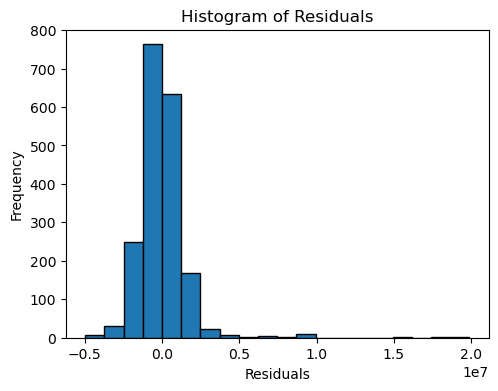

In [44]:
# Histogram of Residuals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')


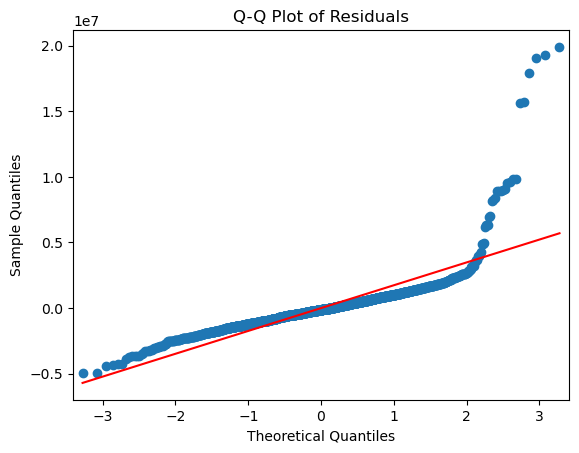

In [45]:
# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [46]:
# Shapiro-Wilk test for normality
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {stat}, p-value: {p_value}')

# Interpretation of Shapiro-Wilk test
if p_value > 0.05:
    print('Residuals appear to be normally distributed (fail to reject H0)')
else:
    print('Residuals do not appear to be normally distributed (reject H0)')

Shapiro-Wilk test statistic: 0.7094115018844604, p-value: 0.0
Residuals do not appear to be normally distributed (reject H0)


# Check for Heteroscedasticity

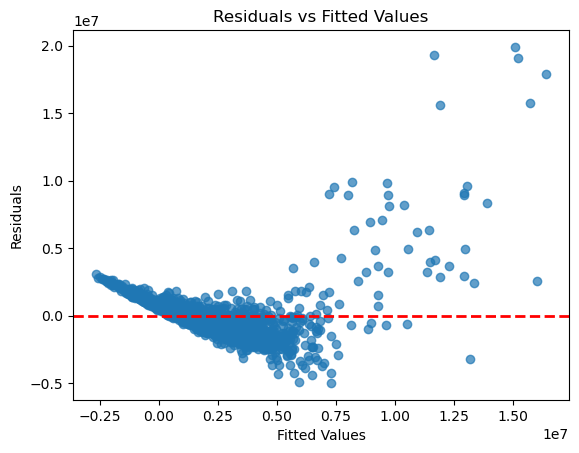

In [47]:
# Plot of Residuals vs Fitted Values (Heteroscedasticity check)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [48]:
# Perform Breusch-Pagan test for heteroscedasticity
_, p_value, _, _ = het_breuschpagan(residuals, X)  # Exclude the constant term for the test
print(f'Breusch-Pagan test p-value: {p_value}')

# Interpretation of the test
if p_value > 0.05:
    print('No evidence of heteroscedasticity (fail to reject H0)')
else:
    print('Evidence of heteroscedasticity (reject H0)')

Breusch-Pagan test p-value: 3.2881179384452356e-71
Evidence of heteroscedasticity (reject H0)


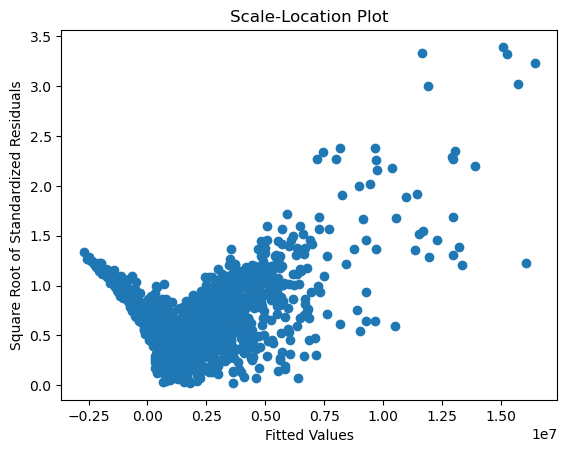

In [49]:
# Calculate standardized residuals
standardized_residuals = model.get_influence().resid_studentized_internal

# Create a Scale-Location plot
plt.scatter(model.fittedvalues, np.sqrt(np.abs(standardized_residuals)))
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.show()

# Summary

In [50]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     488.7
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:11:18   Log-Likelihood:                -30076.
No. Observations:                1905   AIC:                         6.017e+04
Df Residuals:                    1897   BIC:                         6.021e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.086e+06   3

In [51]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3025982656328.7275
R-squared: 0.6432582985008932


# UPDATED LINEAR REGRESSION MODEL

<Axes: >

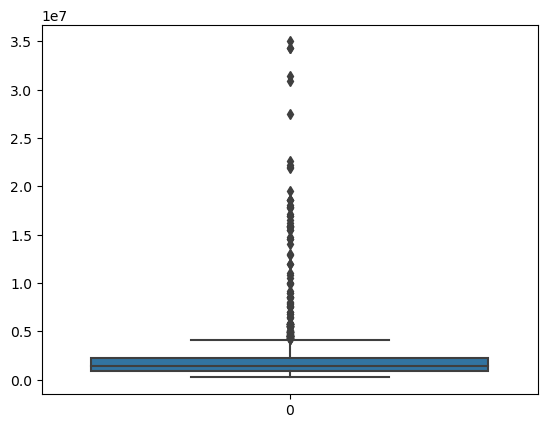

In [65]:
import seaborn as sns
sns.boxplot(df['price'])

In [66]:
def remove_outliers_iqr_dataframe(df_reg, column, k=1.5):
    """
    Remove outliers from a DataFrame based on a specific column using Interquartile Range (IQR) method.

    Parameters:
        df (pandas DataFrame): Input DataFrame.
        column (str): Name of the column to use for outlier removal.
        k (float): Multiplier for IQR.

    Returns:
        pandas DataFrame: DataFrame with outliers removed.
    """
    q1 = df_reg[column].quantile(0.25)
    q3 = df_reg[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return df_reg[(df_reg[column] >= lower_bound) & (df_reg[column] <= upper_bound)]

cleaned_df = remove_outliers_iqr_dataframe(df_reg, 'price')
print("Cleaned DataFrame (IQR method):\n", cleaned_df)

Cleaned DataFrame (IQR method):
       Facilities  Amenities  Home Size  Personal Facilities  Gathering Hub  \
0      -0.020831  -0.227219  -0.587922            -0.549496       2.152350   
1      -0.382716   0.134017  -0.173991            -0.675219       0.795296   
2       0.096810   0.674179   1.832013             0.672466      -0.786427   
3      -0.451699  -0.839043   0.404876             0.056761       0.053067   
4       0.881831   0.234891  -1.782776            -0.228103      -1.326712   
...          ...        ...        ...                  ...            ...   
1900    3.983500   1.362165   0.022766            -0.057524       0.831337   
1901   -0.040595   0.398190  -0.689011            -0.516649       0.444888   
1902   -0.305249  -0.144162   2.060393            -0.139764       0.613838   
1903   -0.030975   1.020144  -0.534647             3.065842      -0.063682   
1904    1.532065   0.905956  -0.974806            -0.949264       1.208820   

      price_per_sqft  kitchen_

In [67]:
cleaned_df

,Facilities,Amenities,Home Size,Personal Facilities,Gathering Hub,price_per_sqft,kitchen_appliances,price,neighborhood
0,-0.020831,-0.227219,-0.587922,-0.549496,2.152350,0.995586,0.835306,2700000,Palm Jumeirah
1,-0.382716,0.134017,-0.173991,-0.675219,0.795296,0.636730,-0.038807,2850000,Palm Jumeirah
2,0.096810,0.674179,1.832013,0.672466,-0.786427,-0.304486,1.980427,1150000,Jumeirah Lake Towers
3,-0.451699,-0.839043,0.404876,0.056761,0.053067,-0.075868,-1.161255,2850000,Culture Village
4,0.881831,0.234891,-1.782776,-0.228103,-1.326712,2.619128,1.685597,1729200,Palm Jumeirah
...,...,...,...,...,...,...,...,...,...
1900,3.983500,1.362165,0.022766,-0.057524,0.831337,-0.034253,1.050797,1500000,Mohammed Bin Rashid City
1901,-0.040595,0.398190,-0.689011,-0.516649,0.444888,0.831986,1.568872,1230000,Mohammed Bin Rashid City
1902,-0.305249,-0.144162,2.060393,-0.139764,0.613838,-1.663009,-0.730978,2900000,Dubai Creek Harbour (The Lagoons)
1903,-0.030975,1.020144,-0.534647,3.065842,-0.063682,-1.359371,1.092569,675000,Jumeirah Village Circle


# UPDATED WITHOUT TRANSFORMATION MODEL

In [68]:
model1 = LinearRegression()

In [69]:
X1 = cleaned_df[['Facilities', 'Amenities', 'Home Size', 'Personal Facilities',
       'Gathering Hub', 'price_per_sqft', 'kitchen_appliances']]
y1 = cleaned_df['price']

In [70]:
X1 = sm.add_constant(X1)

In [71]:
model1 = sm.OLS(y1, X1).fit()

In [72]:
# Calculate residuals manually
y_pred1 = model.predict(X1)
residuals1 = y1 - y_pred1

Text(0, 0.5, 'Frequency')

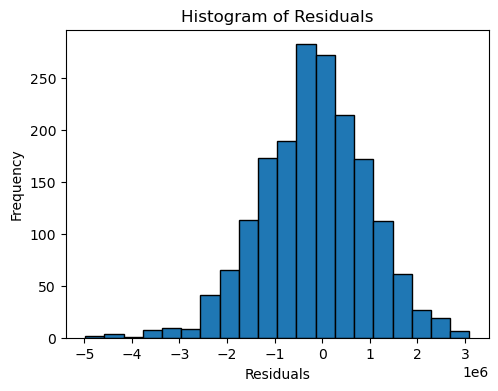

In [73]:
# Histogram of Residuals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(residuals1, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

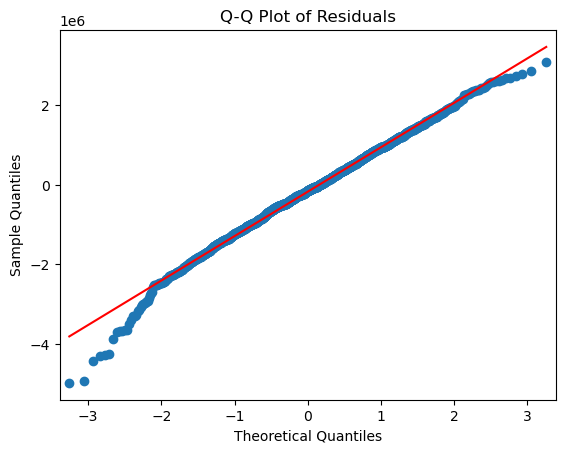

In [74]:
# Q-Q Plot
sm.qqplot(residuals1, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [75]:
# Shapiro-Wilk test for normality
stat, p_value = shapiro(residuals1)
print(f'Shapiro-Wilk test statistic: {stat}, p-value: {p_value}')

# Interpretation of Shapiro-Wilk test
if p_value > 0.05:
    print('Residuals appear to be normally distributed (fail to reject H0)')
else:
    print('Residuals do not appear to be normally distributed (reject H0)')

Shapiro-Wilk test statistic: 0.9933231472969055, p-value: 3.379016391136247e-07
Residuals do not appear to be normally distributed (reject H0)


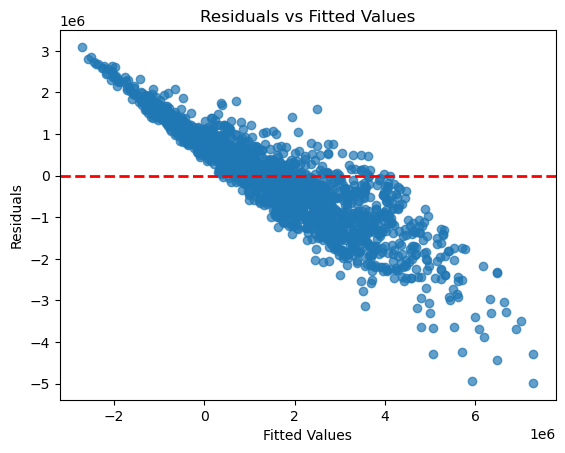

In [76]:
# Plot of Residuals vs Fitted Values (Heteroscedasticity check)
plt.scatter(y_pred1 , residuals1 , alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

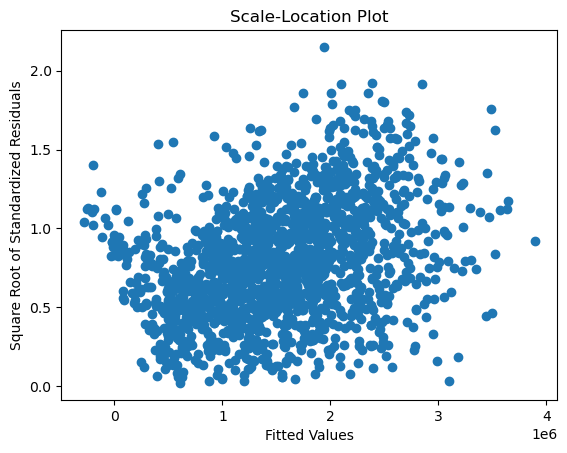

In [77]:
# Calculate standardized residuals
standardized_residuals = model1.get_influence().resid_studentized_internal

# Create a Scale-Location plot
plt.scatter(model1.fittedvalues, np.sqrt(np.abs(standardized_residuals)))
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.show()

In [78]:
# Perform Breusch-Pagan test for heteroscedasticity
_, p_value, _, _ = het_breuschpagan(residuals1, X1)  # Exclude the constant term for the test
print(f'Breusch-Pagan test p-value: {p_value}')

# Interpretation of the test
if p_value > 0.05:
    print('No evidence of heteroscedasticity (fail to reject H0)')
else:
    print('Evidence of heteroscedasticity (reject H0)')

Breusch-Pagan test p-value: 3.468857854993227e-91
Evidence of heteroscedasticity (reject H0)


# After log Transformation New model

In [79]:
model2 = LinearRegression()

In [80]:
y2 = np.log1p(y1)

In [81]:
model2 = sm.OLS(y2, X1).fit()

In [82]:
# Calculate residuals manually
y1_pred2 = model2.predict(X1)
residuals2 = y2- y1_pred2

# check for Normality

Text(0, 0.5, 'Frequency')

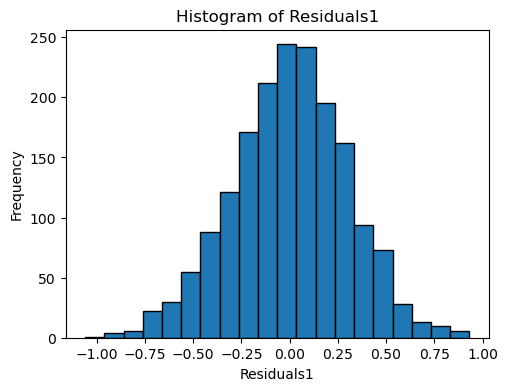

In [83]:
# Histogram of Residuals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(residuals2, bins=20, edgecolor='black')
plt.title('Histogram of Residuals1')
plt.xlabel('Residuals1')
plt.ylabel('Frequency')

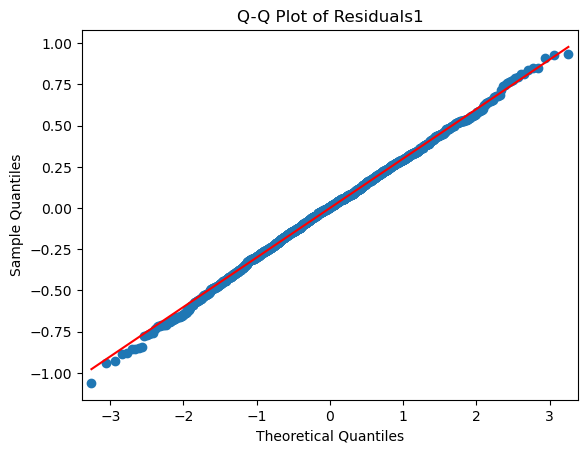

In [84]:
# Q-Q Plot

sm.qqplot(residuals2, line='s')
plt.title('Q-Q Plot of Residuals1')
plt.show()

In [85]:
# Shapiro-Wilk test for normality
stat, p_value = shapiro(residuals2)
print(f'Shapiro-Wilk test statistic: {stat}, p-value: {p_value}')

# Interpretation of Shapiro-Wilk test
if p_value > 0.05:
    print('Residuals appear to be normally distributed (fail to reject H0)')
else:
    print('Residuals do not appear to be normally distributed (reject H0)')

Shapiro-Wilk test statistic: 0.9986687898635864, p-value: 0.18830381333827972
Residuals appear to be normally distributed (fail to reject H0)


# Check for heteroscedasticity

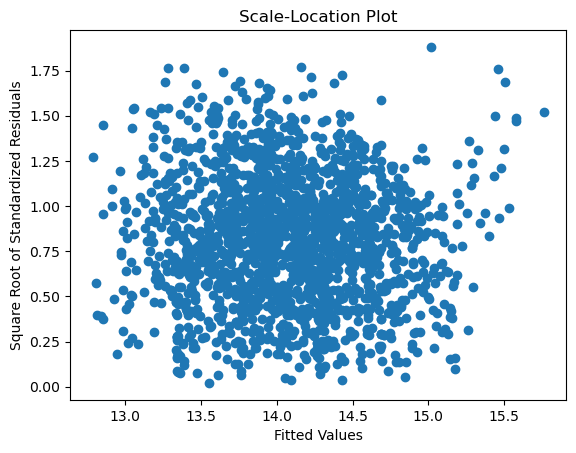

In [91]:
# Calculate standardized residuals
standardized_residuals = model2.get_influence().resid_studentized_internal

# Create a Scale-Location plot
plt.scatter(model2.fittedvalues, np.sqrt(np.abs(standardized_residuals)))
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.show()

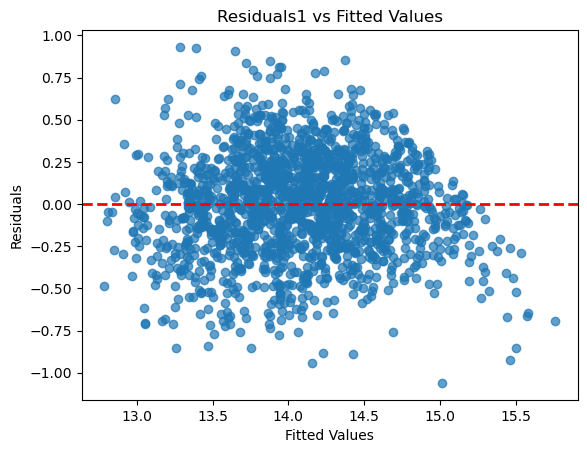

In [92]:
# Plot of Residuals vs Fitted Values (Heteroscedasticity check)
plt.scatter(y1_pred2, residuals2, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals1 vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Summary

In [88]:
summary2 = model2.summary()
print(summary2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     719.5
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:28:19   Log-Likelihood:                -382.03
No. Observations:                1777   AIC:                             780.1
Df Residuals:                    1769   BIC:                             823.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.1856    